In [24]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())
# Load the dataset

reviews_df = pd.read_csv('../Data Resource/cleaned_reviews.csv')

# Display initial rows to understand the data structure
print("Initial Data Preview:")
display(reviews_df.head())

/Users/saniyakulkarni/Desktop/Project-Repo-G6_1-1/Final Project Code
Initial Data Preview:


,coffee_shop_name,full_review_text,star_rating,star_rating_clean
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0 star rating,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0 star rating,4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0 star rating,4.0
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0 star rating,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0 star rating,4.0


In [25]:
#Extract date from the `full_review_text` column and create a `review_date` column
def extract_date(review_text):
    """Extracts date in MM/DD/YYYY format from review text."""
    match = re.search(r'\b(\d{1,2}/\d{1,2}/\d{4})\b', review_text)
    return match.group(1) if match else None

In [26]:
# Apply the date extraction function
reviews_df['review_date'] = reviews_df['full_review_text'].apply(extract_date)


In [27]:
#Convert `review_date` column to datetime format for time-based analysis
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'], errors='coerce')

In [28]:
# Clean `star_rating` column to retain only numeric values
# Remove any non-numeric characters and convert to float
reviews_df['star_rating_clean'] = reviews_df['star_rating'].str.extract(r'(\d+\.?\d*)').astype(float)

# Remove unwanted text from `full_review_text` such as "check-in" or specific non-informative phrases
reviews_df['cleaned_review_text'] = reviews_df['full_review_text'].replace(r'\b(check-in|check-ins)\b', '', regex=True)

# Drop any duplicate reviews based on `full_review_text` and `coffee_shop_name`
reviews_df.drop_duplicates(subset=['full_review_text', 'coffee_shop_name'], inplace=True)

In [29]:
# Display cleaned data to verify the cleaning steps
print("\nCleaned Data Preview:")
display(reviews_df[['coffee_shop_name', 'review_date', 'star_rating_clean', 'cleaned_review_text']].head(10))



Cleaned Data Preview:


,coffee_shop_name,review_date,star_rating_clean,cleaned_review_text
0,The Factory - Cafe With a Soul,2016-11-25,5.0,11/25/2016 1 love love loved the atmosphere! ...
1,The Factory - Cafe With a Soul,2016-12-02,4.0,"12/2/2016 listed in date night: austin, ambian..."
2,The Factory - Cafe With a Soul,2016-11-30,4.0,11/30/2016 1 listed in brunch spots i loved t...
3,The Factory - Cafe With a Soul,2016-11-25,2.0,11/25/2016 very cool decor! good drinks nice s...
4,The Factory - Cafe With a Soul,2016-12-03,4.0,12/3/2016 1 they are located within the north...
5,The Factory - Cafe With a Soul,2016-11-20,4.0,11/20/2016 1 very cute cafe! i think from the...
6,The Factory - Cafe With a Soul,2016-10-27,4.0,"10/27/2016 2 listed in ""nuptial coffee bliss!..."
7,The Factory - Cafe With a Soul,2016-11-02,5.0,11/2/2016 2 love this place! 5 stars for clea...
8,The Factory - Cafe With a Soul,2016-10-25,3.0,"10/25/2016 1 ok, let's try this approach... p..."
9,The Factory - Cafe With a Soul,2016-11-10,5.0,11/10/2016 3 this place has been shown on my ...


In [30]:
#Save the cleaned dataset to a new CSV file
reviews_df.to_csv('cleaned_reviews_final.csv', index=False)
print("\nCleaned data has been saved as 'cleaned_reviews_final.csv'")


Cleaned data has been saved as 'cleaned_reviews_final.csv'


In [31]:
# Group by coffee shop name to calculate the average star rating and the count of reviews
coffee_shop_summary = reviews_df.groupby('coffee_shop_name').agg(
    average_star_rating=('star_rating_clean', 'mean'),
    review_count=('full_review_text', 'count')
).reset_index()

In [32]:
# Sort the summary by review_count in descending order
coffee_shop_summary = coffee_shop_summary.sort_values(by='review_count', ascending=False)


In [33]:
# Display the resulting sorted summary
print("Summary of Coffee Shops Sorted by Review Count:")
display(coffee_shop_summary)

Summary of Coffee Shops Sorted by Review Count:


,coffee_shop_name,average_star_rating,review_count
20,Epoch Coffee,3.865000,200
32,Houndstooth Coffee,4.175000,200
8,CaffÃ© Medici,4.174825,143
2,Apanas Coffee & Beer,4.550847,118
78,Vintage Heart Coffee,4.170000,100
...,...,...,...
44,Lucky Lab Coffee,4.440000,25
59,Sister Coffee,4.470588,17
37,Kowabunga Coffee,4.812500,16
71,The Marvelous Vintage Tea Party Co.,5.000000,10


In [34]:
#Here we are assuming that the "review count" is equal to "frequency of vsiits"
# Group by coffee shop name to calculate the average star rating and the count of reviews
coffee_shop_summary = reviews_df.groupby('coffee_shop_name').agg(
    average_star_rating=('star_rating_clean', 'mean'),
    frequency_of_visits=('full_review_text', 'count')  # Renamed here
).reset_index()

# Sort the summary by frequency_of_visits in descending order
coffee_shop_summary = coffee_shop_summary.sort_values(by='frequency_of_visits', ascending=False)

# Display the resulting sorted summary
print("Summary of Coffee Shops Sorted by Frequency of Visits:")
display(coffee_shop_summary)

Summary of Coffee Shops Sorted by Frequency of Visits:


,coffee_shop_name,average_star_rating,frequency_of_visits
20,Epoch Coffee,3.865000,200
32,Houndstooth Coffee,4.175000,200
8,CaffÃ© Medici,4.174825,143
2,Apanas Coffee & Beer,4.550847,118
78,Vintage Heart Coffee,4.170000,100
...,...,...,...
44,Lucky Lab Coffee,4.440000,25
59,Sister Coffee,4.470588,17
37,Kowabunga Coffee,4.812500,16
71,The Marvelous Vintage Tea Party Co.,5.000000,10


In [35]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

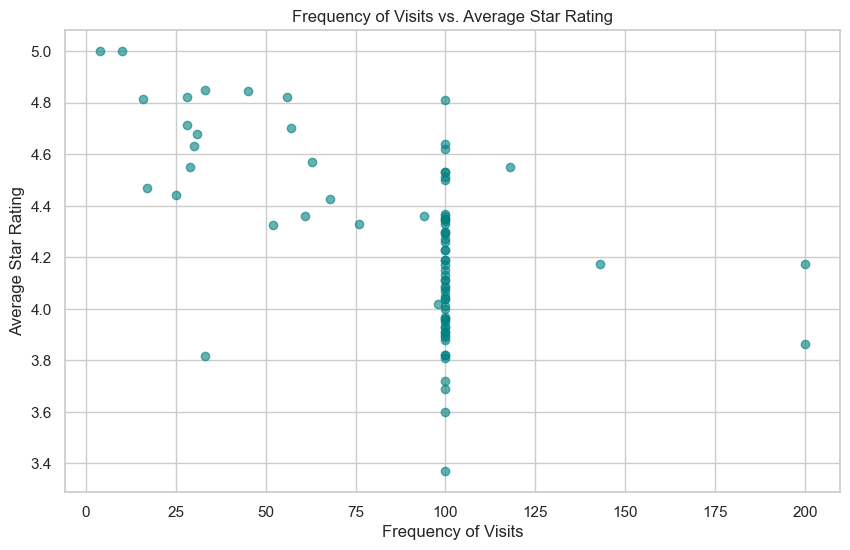

In [36]:
# 1. Scatter Plot - Frequency of Visits vs. Average Star Rating
plt.figure(figsize=(10, 6))
plt.scatter(coffee_shop_summary['frequency_of_visits'], coffee_shop_summary['average_star_rating'], alpha=0.6, color='teal')
plt.title('Frequency of Visits vs. Average Star Rating')
plt.xlabel('Frequency of Visits')
plt.ylabel('Average Star Rating')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


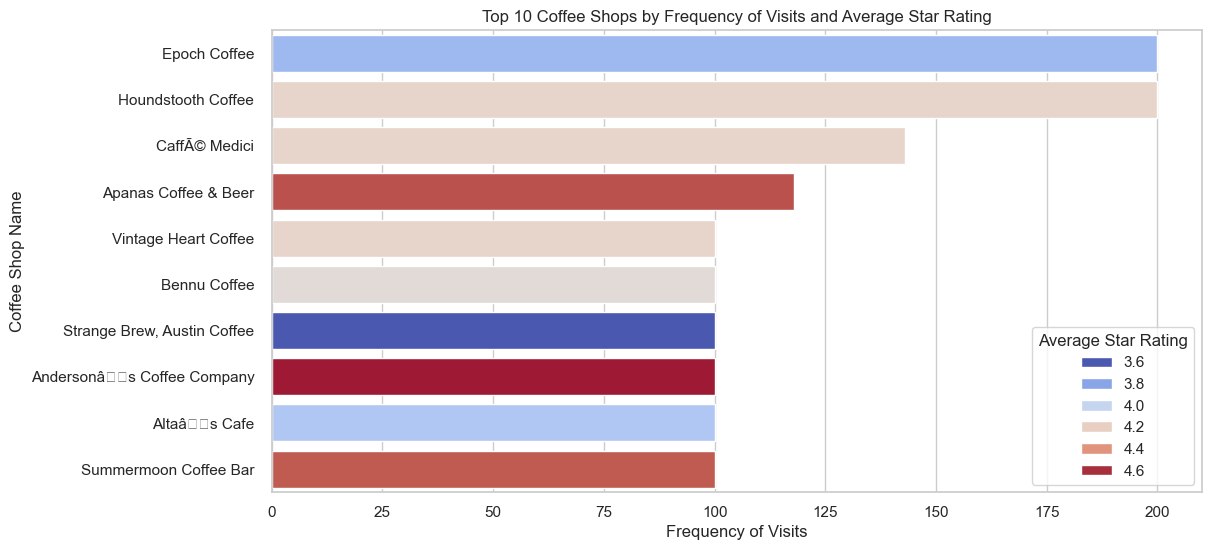

In [37]:
# 2. Bar Plot - Top 10 Coffee Shops by Frequency of Visits and Their Average Star Rating
top_10_coffee_shops = coffee_shop_summary.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency_of_visits', y='coffee_shop_name', hue='average_star_rating', data=top_10_coffee_shops, palette="coolwarm", dodge=False)
plt.title('Top 10 Coffee Shops by Frequency of Visits and Average Star Rating')
plt.xlabel('Frequency of Visits')
plt.ylabel('Coffee Shop Name')
plt.legend(title='Average Star Rating')
plt.show()

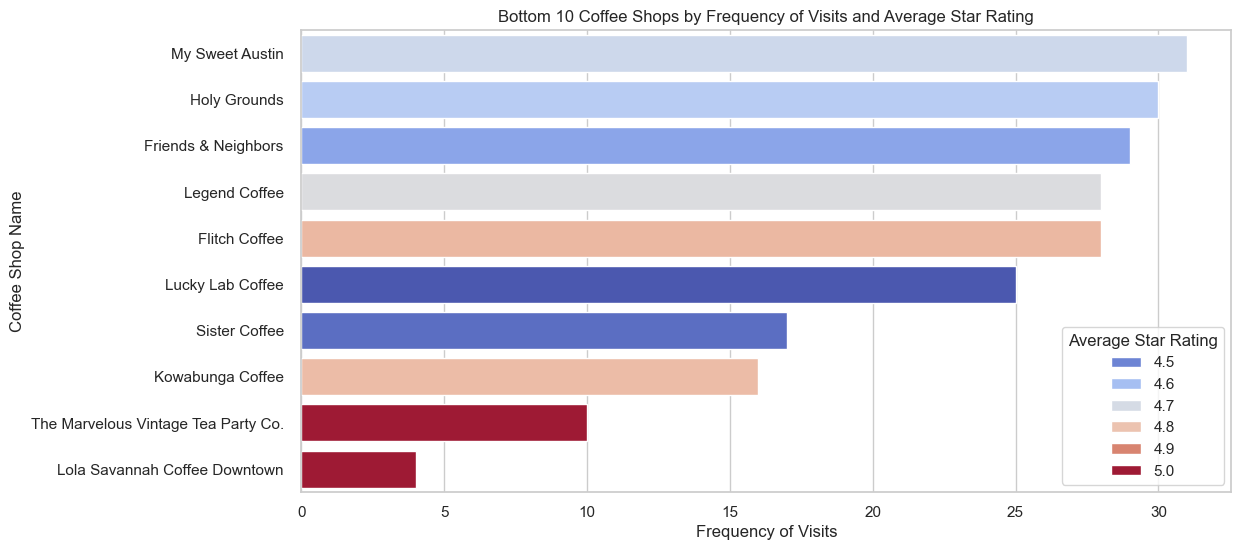

In [38]:
# Bottom 10 Coffee Shops by Frequency of Visits
bottom_10_coffee_shops = coffee_shop_summary.tail(10)

# Plotting the Bottom 10 Coffee Shops by Frequency of Visits and Their Average Star Rating
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency_of_visits', y='coffee_shop_name', hue='average_star_rating', data=bottom_10_coffee_shops, palette="coolwarm", dodge=False)
plt.title('Bottom 10 Coffee Shops by Frequency of Visits and Average Star Rating')
plt.xlabel('Frequency of Visits')
plt.ylabel('Coffee Shop Name')
plt.legend(title='Average Star Rating')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


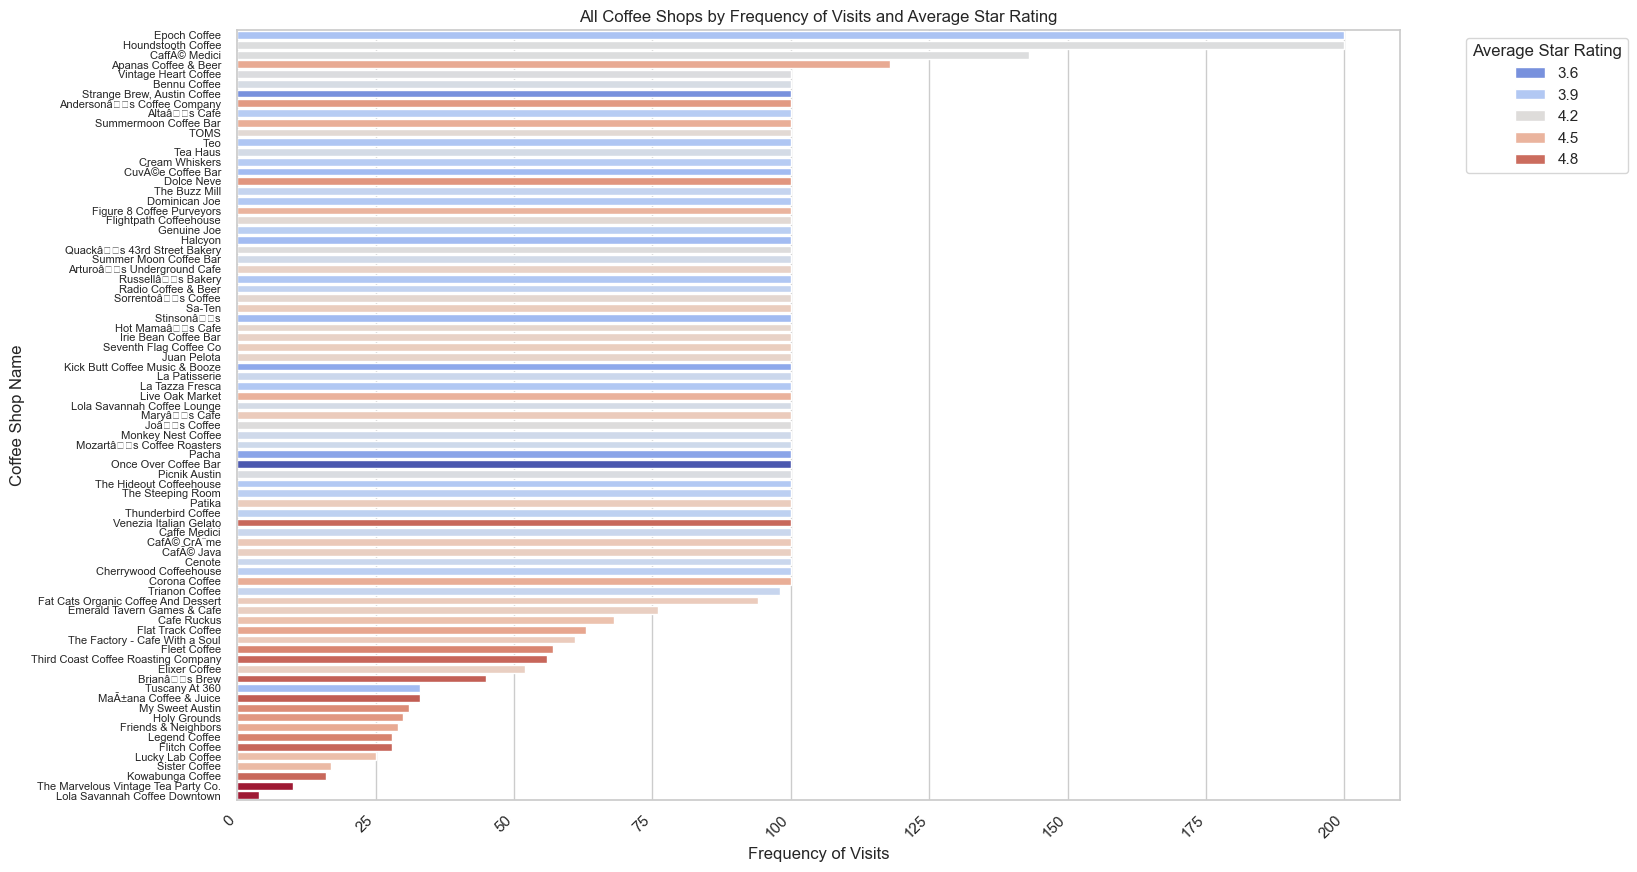

In [39]:
# Plotting all Coffee Shops by Frequency of Visits and Their Average Star Rating
plt.figure(figsize=(15, 10))  # Adjust figure size for readability
sns.barplot(x='frequency_of_visits', y='coffee_shop_name', hue='average_star_rating', data=coffee_shop_summary, palette="coolwarm", dodge=False)
plt.title('All Coffee Shops by Frequency of Visits and Average Star Rating')
plt.xlabel('Frequency of Visits')
plt.ylabel('Coffee Shop Name')
plt.legend(title='Average Star Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside for clarity
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if necessary for larger values
# Set smaller font size for y-axis labels (coffee shop names)
plt.yticks(fontsize=8) 
plt.show()